In [128]:
import sympy as sym
import sympy.physics.mechanics as me
from sympy.abc import t as time
import pandas as pd
import seaborn as sns

import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

import sys, os

sys.path.insert(1, os.path.join(sys.path[0], '../..'))
import custom_plot_objects as cpo

import ModelFramework as mf
import ModelFramework.Elements as ele
import ModelFramework.ExternalForces as ef
import FwtModels.RectWing as rw
import FwtModels.TwoDoF as TwoDoF
import FwtModels as fm

from matplotlib.lines import Line2D

me.mechanics_printing()

In [129]:
alpha = sym.Symbol('alpha')
beta = sym.Symbol('beta')
Lambda = sym.Symbol('Lambda')
theta = sym.Symbol('theta')

aoa = fm.GetAoA(alpha,beta,Lambda,theta)
func_aoa = sym.lambdify([theta,alpha,beta,Lambda],aoa)
func_d_aoa = sym.lambdify([theta,alpha,beta,Lambda],aoa.diff(theta))

In [130]:
L = np.deg2rad([10])
T = np.deg2rad(np.linspace(-150,150,31))
B = np.deg2rad(np.linspace(-20,20,41))
A = np.deg2rad(np.linspace(0,10,5))

In [131]:
import itertools

In [132]:
i = itertools.product(T,A,B,L)
f = lambda x: (*x,func_aoa(*x),func_d_aoa(*x))
res = pd.DataFrame(list(map(f,i)),columns=['Theta','Root Alpha','Beta','Lambda','AoA','AoA_d_theta'])
res = res.applymap(np.rad2deg)
res['AoA_d_theta'] = res['AoA_d_theta'].apply(np.deg2rad)
res['Stable'] = res['AoA_d_theta']<0

In [133]:
res

,Theta,Root Alpha,Beta,Lambda,AoA,AoA_d_theta,Stable
0,-150.0,0.0,-20.0,10.0,4.982236,0.151165,False
1,-150.0,0.0,-19.0,10.0,4.489364,0.136223,False
2,-150.0,0.0,-18.0,10.0,3.995921,0.121249,False
3,-150.0,0.0,-17.0,10.0,3.501679,0.106240,False
4,-150.0,0.0,-16.0,10.0,3.006406,0.091195,False
...,...,...,...,...,...,...,...
6350,150.0,10.0,16.0,10.0,4.727525,-0.576782,True
6351,150.0,10.0,17.0,10.0,5.346139,-0.599525,True
6352,150.0,10.0,18.0,10.0,5.976135,-0.622620,True
6353,150.0,10.0,19.0,10.0,6.618185,-0.646074,True


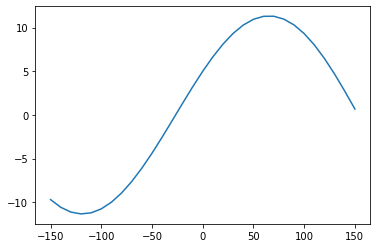

In [149]:
b = 0
ra = 5
tmp_res = res[(res['Root Alpha']==ra) & (res['Beta']==b)]
tmp_res
plt.plot(tmp_res['Theta'],tmp_res['AoA'])

In [151]:
from scipy.optimize import minimize
minimize(lambda x,a,b,l:func_aoa(np.deg2rad(x[0]),a,b,l),0,args=tuple(np.deg2rad([0,0,17])))


      fun: -0.31070568651337055
 hess_inv: array([[11310.866564]])
      jac: array([3.68058681e-06])
  message: 'Optimization terminated successfully.'
     nfev: 33
      nit: 4
     njev: 11
   status: 0
  success: True
        x: array([-95.3221965])

In [123]:
f = lambda x,a,b,l:func_aoa(x[0],a,b,l)
f([0],0,0,0)

In [125]:
tuple(np.deg2rad([0,0,10]))